<a href="https://colab.research.google.com/github/VivekAlamwar/new-repo/blob/main/RFM_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
 df = pd.read_csv("/content/Online Retail2.csv", encoding='ISO-8859-1')
except Exception as e:
    print(f"Error: {e}")

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##Frequency : How Many times customer buy stocks




In [ ]:

f=df.groupby('CustomerID').agg({'InvoiceNo':'count'}).reset_index()


In [ ]:
f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


##Recency: How Recently customer Buy stock to under stand active and inactive customers

In [ ]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['InvoiceDate'].max()

Timestamp('2011-12-10 17:19:00')

In [ ]:
max_days=df['InvoiceDate'].max()

In [ ]:
df[]

In [ ]:
df['How Recently Bought Stocks']=(max_days-df['InvoiceDate']).dt.days+1

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,How Recently Bought Stocks,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,697,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,697,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,697,20.34


- If the customer buy stock ten times then against that customer total 10 entries will there. We calculate recency we are interested only in latest stock purchase by customer. so we will take min of how recently bought stock.

In [ ]:
a=df['CustomerID'].value_counts()==10

In [ ]:
a

17841.0    False
14911.0    False
14096.0    False
12748.0    False
14606.0    False
           ...  
15070.0    False
15753.0    False
17065.0    False
16881.0    False
16995.0    False
Name: CustomerID, Length: 4372, dtype: bool

In [ ]:
r=df.groupby('CustomerID').agg({'How Recently Bought Stocks':'min'}).reset_index()

In [ ]:
r.head()

,CustomerID,How Recently Bought Stocks
0,12346.0,327
1,12347.0,41
2,12348.0,77
3,12349.0,20
4,12350.0,312


##Monatery: How much Amount is spend by each customer

In [ ]:
df['amount']=df['UnitPrice']*df['Quantity']

In [ ]:
m=df.groupby('CustomerID').agg({'amount':'sum'}).reset_index()

In [ ]:
m.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## Merging r,f,m tables to form RFM table will be used for normalizing the data.

In [ ]:
b=pd.merge(f,r,on='CustomerID',how='inner')

In [ ]:
rfm=pd.merge(b,m,on='CustomerID',how='inner')

In [ ]:
rfm.columns=['CustomerID','Frequency','Recency','Monetary']

In [ ]:
rfm.head()

,CustomerID,Frequency,Recency,Monetary
0,12346.0,2,327,0.00
1,12347.0,182,41,4310.00
2,12348.0,31,77,1797.24
3,12349.0,73,20,1757.55
4,12350.0,17,312,334.40


In [ ]:
rfm.columns

Index(['CustomerID', 'Frequency', 'Recency', 'Monetary'], dtype='object')

## Normalizing the data on the scale of 1-5

In [ ]:
for column in ['Frequency', 'Recency', 'Monetary']:
  rfm[column+'Normalized']=pd.qcut(rfm[column],q=[0,0.2,0.6,0.8,1],labels=False)+1

In [ ]:
rfm['rfm_score']=rfm['FrequencyNormalized']+rfm['RecencyNormalized']+rfm['MonetaryNormalized']

In [ ]:
rfm.head()

,CustomerID,Frequency,Recency,Monetary,FrequencyNormalized,RecencyNormalized,MonetaryNormalized,rfm_score
0,12346.0,2,327,0.00,1,4,1,6
1,12347.0,182,41,4310.00,4,2,4,10
2,12348.0,31,77,1797.24,2,2,3,7
3,12349.0,73,20,1757.55,3,2,3,8
4,12350.0,17,312,334.40,2,4,2,8


#Categorizing the customer on the basis of rfm score.
- 0-7 as at_risk
- 8-9 as potential loyalists
- 10-11 as loyal customers
- 11-14 as champions



In [ ]:
rfm['rfm_category']=pd.cut(rfm['rfm_score'],
                           bins=[0,7,9,11,14,float('inf')],
                           labels=['at_risk','potential loyalists','loyal customers','champions',''])

In [ ]:
rfm.head()

,CustomerID,Frequency,Recency,Monetary,FrequencyNormalized,RecencyNormalized,MonetaryNormalized,rfm_score,rfm_category
0,12346.0,2,327,0.00,1,4,1,6,at_risk
1,12347.0,182,41,4310.00,4,2,4,10,loyal customers
2,12348.0,31,77,1797.24,2,2,3,7,at_risk
3,12349.0,73,20,1757.55,3,2,3,8,potential loyalists
4,12350.0,17,312,334.40,2,4,2,8,potential loyalists


## Converting the rfm socre and cutomer category (rfm category) into heat map.

In [ ]:
heat_map=rfm.pivot_table(index='rfm_category',
                         columns='rfm_score',
                         aggfunc='size',
                         fill_value=0)

In [ ]:
heat_map

rfm_score,3,4,5,6,7,8,9,10,11,12
rfm_category,,,,,,,,,,
at_risk,30,202,451,962,856,0,0,0,0,0
potential loyalists,0,0,0,0,0,845,634,0,0,0
loyal customers,0,0,0,0,0,0,0,336,47,0
champions,0,0,0,0,0,0,0,0,0,9
,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='rfm_score', ylabel='rfm_category'>

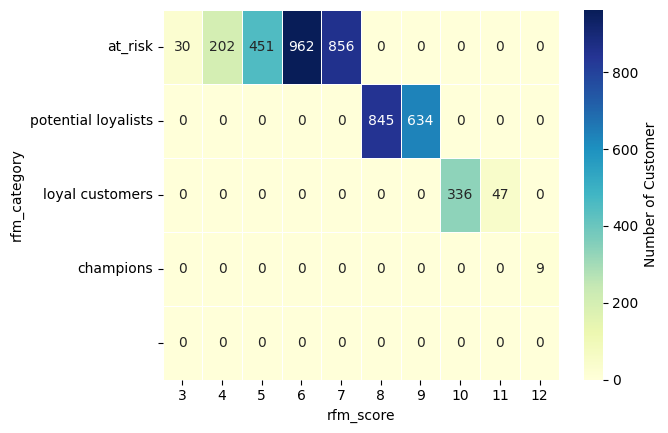

In [ ]:
sns.heatmap(heat_map,annot=True,fmt='d',cmap='YlGnBu',linewidths=0.5,cbar_kws={'label':'Number of Customer'})
